In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline

 Load and split the modelling dataset into Train and Test sets.

In [2]:
df= pd.read_csv('final_df.csv')
df.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,BuildingArea,Propertycount,Build_Age,Type_h,...,Method_SA,Method_SP,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,1.0,1.0,202.0,167.281095,4019.0,52.0,1,...,0,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,1.0,0.0,156.0,79.000000,4019.0,122.0,1,...,0,0,0,0,1,0,0,0,0,0
2,2,941000.0,2.5,1.0,0.0,181.0,167.281095,4019.0,52.0,1,...,0,0,0,0,1,0,0,0,0,0
3,3,1876000.0,2.5,2.0,0.0,245.0,210.000000,4019.0,112.0,1,...,0,0,0,0,1,0,0,0,0,0
4,2,1636000.0,2.5,1.0,2.0,256.0,107.000000,4019.0,132.0,1,...,0,0,0,0,1,0,0,0,0,0


In [3]:
cols = ['Landsize','Rooms','Distance','Bathroom','Car','Propertycount','BuildingArea','Build_Age','Regionname_Eastern Metropolitan', 'Regionname_Eastern Victoria','Regionname_Northern Metropolitan','Regionname_Northern Victoria','Regionname_South-Eastern Metropolitan',
        'Regionname_Southern Metropolitan','Regionname_Western Metropolitan','Regionname_Western Victoria','Type_h','Type_t','Type_u','Method_SA','Method_SP','Method_S']

X = df[cols]
y = df['Price']

train_X, test_X, train_y, test_y = train_test_split(X,y,test_size=0.25, random_state=0)
print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(7610, 22) (2537, 22) (7610,) (2537,)


### 1.Initial predictive models

We execute 8 regression&ensembled models together to find which ML model works best for this particular dataset.
We are looking for a model with the highest R2 and lowest RMSE.

In [4]:

regressors = [
    GradientBoostingRegressor(),
    KNeighborsRegressor(),
    ExtraTreesRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor(),
    LinearRegression(),
    Lasso(),
    Ridge()
]
for model in regressors:
    model.fit(train_X, train_y)
    y_pred = model.predict(test_X)    
    print(model)
    print("\tRMSE:", np.sqrt(metrics.mean_squared_error(test_y, y_pred)))
    print("\tR2 score:", r2_score(test_y, y_pred))

GradientBoostingRegressor()
	RMSE: 200331.79226542386
	R2 score: 0.7841217668616096
KNeighborsRegressor()
	RMSE: 289688.17300575285
	R2 score: 0.548590565562443
ExtraTreesRegressor()
	RMSE: 196563.56377507013
	R2 score: 0.7921666983175488
RandomForestRegressor()
	RMSE: 187746.5531178866
	R2 score: 0.8103935762502867
DecisionTreeRegressor()
	RMSE: 255278.41169308775
	R2 score: 0.6494602438957473
LinearRegression()
	RMSE: 262148.92420692864
	R2 score: 0.6303376146054163
Lasso()
	RMSE: 262148.14018006105
	R2 score: 0.6303398257516917
Ridge()
	RMSE: 262152.46274535835
	R2 score: 0.6303276349849471


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 60621231511381.0, tolerance: 134282554401.14911
  model = cd_fast.enet_coordinate_descent(


Random Forest Regressor is the winner: R2=0.81, RMSE=188000.

### 2.Random Forest Regressor

We will try to find the best parameters to tune the model. 

In [5]:

from sklearn.model_selection import GridSearchCV
grid = { 
    'n_estimators': [25, 50, 100],
    'max_features':['sqrt', 'log2', None],
    'max_depth' : [5, 10, 15, 25],
}
CV_rfr = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, cv=5, scoring="neg_root_mean_squared_error")
CV_rfr.fit(train_X, train_y)
print(CV_rfr.best_params_,'\n')

{'max_depth': 15, 'max_features': None, 'n_estimators': 100} 



In [6]:
# We fit the model(9th) with the best parameters
rf = RandomForestRegressor(n_estimators = 100,max_depth=15,max_features=None)
rf.fit(train_X, train_y)
rf_pred=rf.predict(test_X)
print('Rsquared = {:.2f}'.format(metrics.explained_variance_score(test_y,rf_pred)))
print('RMSE:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(test_y,rf_pred))))

Rsquared = 0.81
RMSE:187298.34


The result hasn't improved but having RMSE of less than half Price's standard deviation (422,706) is good.

Let's look at the predicted vs actual values.

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


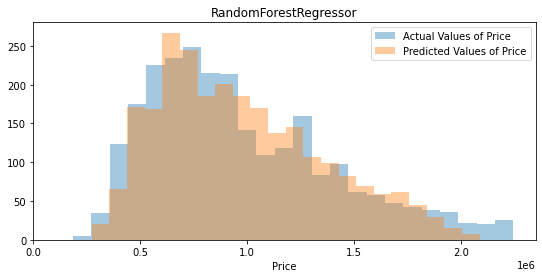

In [7]:
plt.figure(figsize=(9,4))
sns.distplot(test_y, hist=True, kde=False)
sns.distplot(rf_pred, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.title('RandomForestRegressor')
plt.xlim(0,);

We explore features importance,i.e.how much each feature contributes to the reduction of weighted impurity and obtaining additional information about the price.  

Text(0.5, 1.0, 'RandomForestRegressor feature importance')

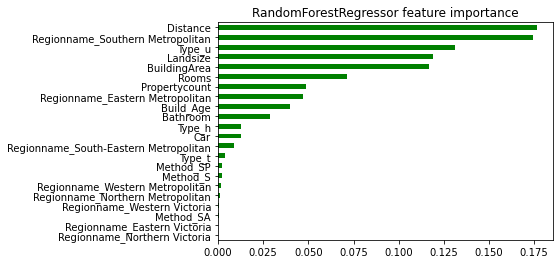

In [8]:
input_features = train_X.columns
feature_importance = rf.feature_importances_
reg_feature_list = pd.Series(feature_importance, input_features)
reg_feature_list.sort_values().plot.barh(color='green')
plt.title('RandomForestRegressor feature importance')

### 3.Extreme Gradient Boosted Regressor

We will try another model which is Extreme Gradient Boosted Regressor (10th).This model uses different syntax and requires that our data be organized as a DMatrix before splitting into Train and Test sets.

In [9]:
import xgboost as xgb

DM_train = xgb.DMatrix(data=train_X, label=train_y)
DM_test = xgb.DMatrix(data=test_X, label=test_y)
params = {'objective':'reg:squarederror','max_depth':5}
xgb_model = xgb.train(params=params, dtrain=DM_train, num_boost_round=100)
y_pred = xgb_model.predict(DM_test)

print('R2 with 100 boost rounds: {:.2f}'.format(metrics.r2_score(test_y, y_pred)))
print('RMSE with 100 boost rounds: {:.2f}'.format(np.sqrt(metrics.mean_squared_error(test_y, y_pred))))

R2 with 100 boost rounds: 0.81
RMSE with 100 boost rounds: 186190.51


The model performs a bit better than RandomForestRegressor. We will loop through different values of parameters to find the best ones.

In [10]:
params = {'objective':'reg:squarederror', 'max_depth': 5}
    
#loop through several possible eta values
eta_vals = [0.001, 0.01, 0.1, 1.0]

for eta in eta_vals:
    params['eta'] = eta
    xgb_model = xgb.train(params=params, dtrain=DM_train, num_boost_round=100)
    y_pred = xgb_model.predict(DM_test)
    print('R2 with 100 boost rounds, learning rate of {}: {:.2f}'.format(eta, metrics.r2_score(test_y, y_pred)))
    print('RMSE with 100 boost rounds, learning rate of {}: {:.2f}'.format(eta, np.sqrt(metrics.mean_squared_error(test_y, y_pred))))

R2 with 100 boost rounds, learning rate of 0.001: -4.05
RMSE with 100 boost rounds, learning rate of 0.001: 968512.50
R2 with 100 boost rounds, learning rate of 0.01: -0.09
RMSE with 100 boost rounds, learning rate of 0.01: 451113.37
R2 with 100 boost rounds, learning rate of 0.1: 0.81
RMSE with 100 boost rounds, learning rate of 0.1: 185452.70
R2 with 100 boost rounds, learning rate of 1.0: 0.74
RMSE with 100 boost rounds, learning rate of 1.0: 219683.80


In [11]:
params = {'objective':'reg:squarederror', 'max_depth': 5, 'eta':0.1}
    
#loop through several possible values of subsamples (rows)
subsample_vals= [0.5, 0.6, 0.7, 0.8, 0.9]

for val in subsample_vals:
    params['subsample'] = val
    xgb_model = xgb.train(params=params, dtrain=DM_train, num_boost_round=100)
    y_pred = xgb_model.predict(DM_test)

    print('R2 with 100 boost rounds, learning rate of 0.1, subsample of {}: {:.2f}'.format(val, metrics.r2_score(test_y, y_pred)))
    print('RMSE with 100 boost rounds, learning rate of 0.1, subsample of {}: {:.2f}'.format(val, np.sqrt(metrics.mean_squared_error(test_y, y_pred))))

R2 with 100 boost rounds, learning rate of 0.1, subsample of 0.5: 0.82
RMSE with 100 boost rounds, learning rate of 0.1, subsample of 0.5: 184116.80
R2 with 100 boost rounds, learning rate of 0.1, subsample of 0.6: 0.82
RMSE with 100 boost rounds, learning rate of 0.1, subsample of 0.6: 184953.31
R2 with 100 boost rounds, learning rate of 0.1, subsample of 0.7: 0.81
RMSE with 100 boost rounds, learning rate of 0.1, subsample of 0.7: 185662.83
R2 with 100 boost rounds, learning rate of 0.1, subsample of 0.8: 0.82
RMSE with 100 boost rounds, learning rate of 0.1, subsample of 0.8: 183146.59
R2 with 100 boost rounds, learning rate of 0.1, subsample of 0.9: 0.82
RMSE with 100 boost rounds, learning rate of 0.1, subsample of 0.9: 184116.14


In [12]:
params = {'objective':'reg:squarederror', 'max_depth': 5, 'eta':0.1, 'subsample':0.8}
    
#loop through several possible values of subsamples (cols)
colsample_vals= [0.7, 0.8, 0.9]

for val in colsample_vals:
    params['colsample_bytree'] = val
    xgb_model = xgb.train(params=params, dtrain=DM_train, num_boost_round=100)
    y_pred = xgb_model.predict(DM_test)

    print('R2 with 100 boost rounds, learning rate of 0.1, colsample_bytree of {}: {:.2f}'.format(val, metrics.r2_score(test_y, y_pred)))
    print('RMSE with 100 boost rounds, learning rate of 0.1, colsample_bytree of {}: {:.2f}'.format(val, np.sqrt(metrics.mean_squared_error(test_y, y_pred))))

R2 with 100 boost rounds, learning rate of 0.1, colsample_bytree of 0.7: 0.82
RMSE with 100 boost rounds, learning rate of 0.1, colsample_bytree of 0.7: 184750.84
R2 with 100 boost rounds, learning rate of 0.1, colsample_bytree of 0.8: 0.82
RMSE with 100 boost rounds, learning rate of 0.1, colsample_bytree of 0.8: 184930.69
R2 with 100 boost rounds, learning rate of 0.1, colsample_bytree of 0.9: 0.82
RMSE with 100 boost rounds, learning rate of 0.1, colsample_bytree of 0.9: 184603.18


### 4.Final model with the best parameters

In [13]:
params = {'objective':'reg:squarederror', 'max_depth': 5, 'eta':0.1, 'subsample':0.8, 'colsample_bytree':0.7}

xgb_model = xgb.train(params=params, dtrain=DM_train, num_boost_round=100)
y_pred = xgb_model.predict(DM_test)

print('Rsquared = {:.2f}'.format(metrics.r2_score(test_y, y_pred)))
print('RMSE:{:.2f}'.format(np.sqrt(metrics.mean_squared_error(test_y, y_pred))))

Rsquared = 0.82
RMSE:184750.84


C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


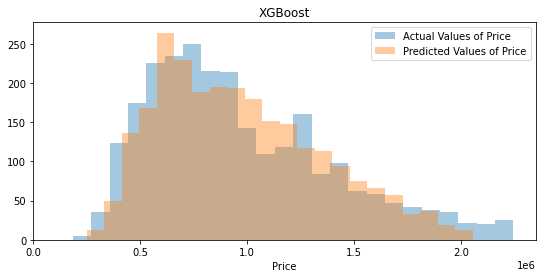

In [14]:
plt.figure(figsize=(9,4))
sns.distplot(test_y, hist=True, kde=False)
sns.distplot(y_pred, hist=True, kde=False)
plt.legend(labels=['Actual Values of Price', 'Predicted Values of Price'])
plt.title('XGBoost')
plt.xlim(0,);

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

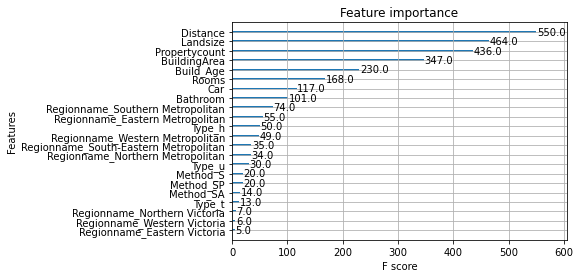

In [16]:
# features importance exploration

from xgboost import plot_importance

plot_importance(xgb_model)

In [17]:
#Lastly, we can inspect the first 10 predictions and true values, to get a sense of the model performance.
pd.DataFrame({'Predicted values':y_pred[:10], 'True values':test_y[:10]})

,Predicted values,True values
7485,7.601542e+05,830000.0
2411,5.319591e+05,440000.0
8978,8.550498e+05,820000.0
4500,6.941371e+05,550000.0
7196,8.124444e+05,1275000.0
1308,8.543518e+05,700000.0
3619,1.070903e+06,1088000.0
7226,1.326256e+06,1031000.0
5193,1.408643e+06,1275000.0
1788,1.018390e+06,1220000.0


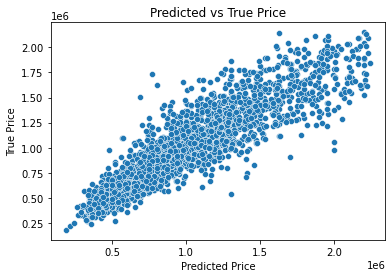

In [10]:
sns.scatterplot(x=test_y, y=y_pred)
plt.title('Predicted vs True Price')
plt.ylabel('True Price')
plt.xlabel('Predicted Price');